## Problem 1

Write a function in Python that uses the Forward Euler method to simulate the SIR model in which the population is slowly growing.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy

In [2]:
def SIR_birthdeath(S0, I0, R0, beta, gamma, mu_b, mu_d, t_max, stepsize):
  T = np.arange(0, t_max+stepsize, stepsize)
  S = np.zeros(len(T))
  I = np.zeros(len(T))
  R = np.zeros(len(T))
  N = np.zeros(len(T))
  
  for idx, t in enumerate(T):
    if (idx == 0):
      S[idx] = S0
      I[idx] = I0 
      R[idx] = R0
      N[idx] = S0 + I0 + R0
    else:
      dS_dt = -beta*S[idx - 1]*I[idx - 1]/N[idx - 1] - mu_d*S[idx - 1] + mu_b*N[idx - 1]
      dI_dt = beta*S[idx - 1]*I[idx - 1]/N[idx - 1] - gamma*I[idx - 1] - mu_d*I[idx - 1]
      dR_dt = gamma*I[idx - 1] - mu_d*R[idx - 1]
      dN_dt = dS_dt + dI_dt + dR_dt
      
      S[idx] = S[idx - 1] + dS_dt*stepsize
      I[idx] = I[idx - 1] + dI_dt*stepsize
      R[idx] = R[idx - 1] + dR_dt*stepsize
      N[idx] = N[idx - 1] + dN_dt*stepsize
  
  return S, I, R, N, T

In [3]:
I0 = 1
S0 = 999
R0 = 0
beta = 1
gamma = 0.5
mu_b = 0.01
mu_d = 0.5 * mu_b

S, I, R, N, T = SIR_birthdeath(S0, I0, R0, beta, gamma, mu_b, mu_d, 100, 0.05)

(0.0, 105.0)

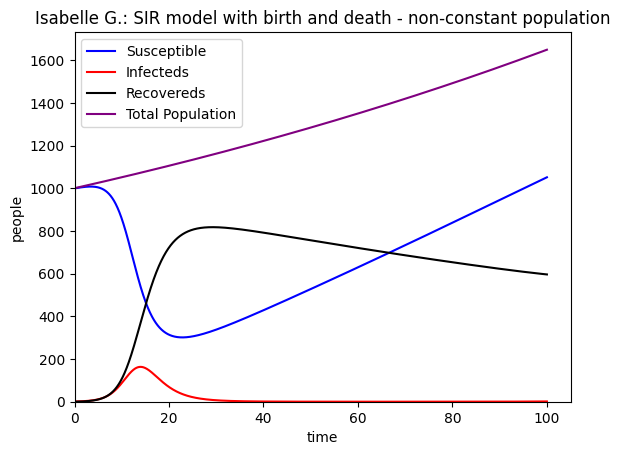

In [4]:
# produce a plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50% to a total of N = 1500
fig, ax = plt.subplots()
ax.plot(T, S, color='b', label='Susceptible')
ax.plot(T, I, color='r', label='Infecteds')
ax.plot(T, R, color='k', label='Recovereds')
ax.plot(T, N, color='purple', label='Total Population')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.set_title('Isabelle G.: SIR model with birth and death - non-constant population')
ax.legend()
ax.set_ylim(bottom = 0)
ax.set_xlim(left=0)

## Problem 3b

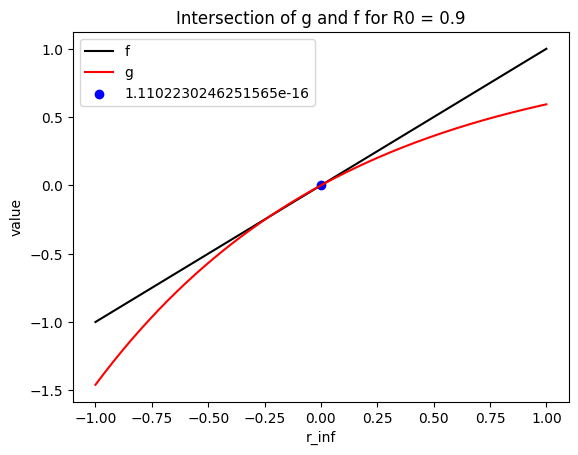

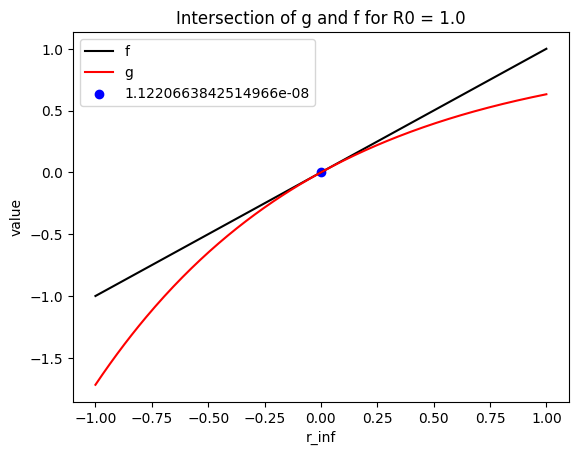

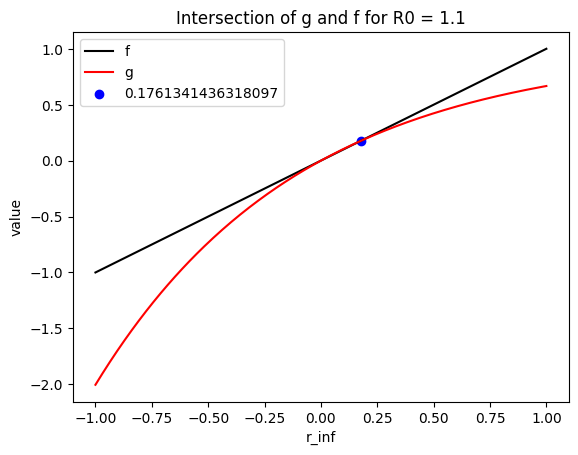

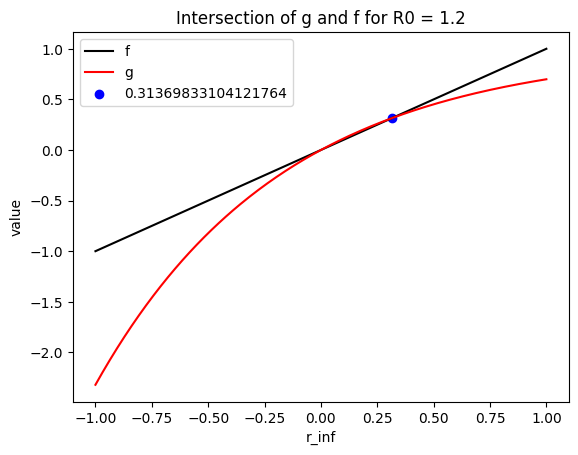

In [5]:
def f(r_inf):
  return r_inf

def g(r_inf, R0):
  return 1 - np.exp(-R0 * r_inf)

def h(r_inf, R0):
  return f(r_inf) - g(r_inf, R0)

R0 = [0.9, 1.0, 1.1, 1.2]
x = np.linspace(-1, 1, 250)
for R in R0:
  plt.plot(x, f(x), color='black', label="f")
  plt.plot(x, g(x, R), color='red', label='g')
  h_func = lambda r: h(r, R)
  intersection = scipy.optimize.fsolve(h_func, 1)[0]
  plt.scatter(intersection, f(intersection), color='blue', label=f"{intersection}")
  plt.title(f"Intersection of g and f for R0 = {R}")
  plt.xlabel("r_inf")
  plt.ylabel("value")
  plt.legend()
  plt.show()

In [6]:
def SIR(S0, I0, R0, beta, gamma, t_max, stepsize):
  T = np.arange(0, t_max+stepsize, stepsize)
  S = np.zeros(len(T))
  I = np.zeros(len(T))
  R = np.zeros(len(T))
  N = S0 + I0 + R0 
  
  for idx, t in enumerate(T):
    if (idx == 0):
      S[idx] = S0
      I[idx] = I0 
      R[idx] = R0
    else:
      dS_dt = -beta*S[idx - 1]*I[idx - 1] / N
      dI_dt = beta*S[idx - 1]*I[idx - 1]/N - gamma*I[idx - 1]
      dR_dt = gamma*I[idx - 1]
      
      S[idx] = S[idx - 1] + dS_dt*stepsize
      I[idx] = I[idx - 1] + dI_dt*stepsize
      R[idx] = R[idx - 1] + dR_dt*stepsize
  
  return S, I, R, T

In [7]:
beta = 1
gamma = 0.5

S, I, R, T = SIR(999, 1, 0, beta, gamma, 50, 0.05)

(0.0, 52.5)

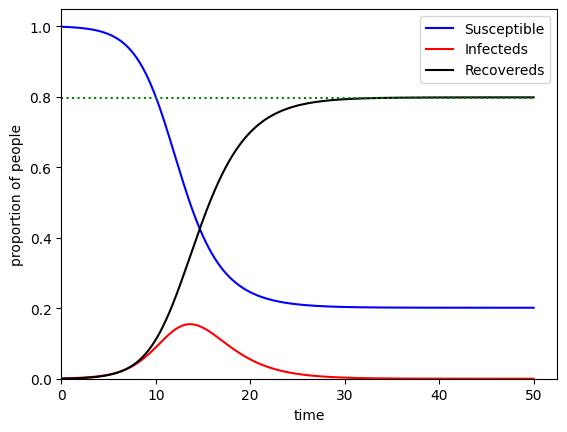

In [8]:
s = S/1000
i = I/1000
r = R/1000

h_func = lambda r: h(r, beta/gamma)
intersection = scipy.optimize.fsolve(h_func, 1)[0]

fig, ax = plt.subplots()
ax.plot(T, s, color='b', label='Susceptible')
ax.plot(T, i, color='r', label='Infecteds')
ax.plot(T, r, color='k', label='Recovereds')
ax.plot(T, np.full_like(T, intersection), color='green', linestyle=":")
ax.set_xlabel('time')
ax.set_ylabel('proportion of people')
ax.legend()
ax.set_ylim(bottom = 0)
ax.set_xlim(left=0)

In [9]:
# This final size prediction appears to work, as it seems to coincide with r as t -> infinity

## Problem 4

(0.0, 52.5)

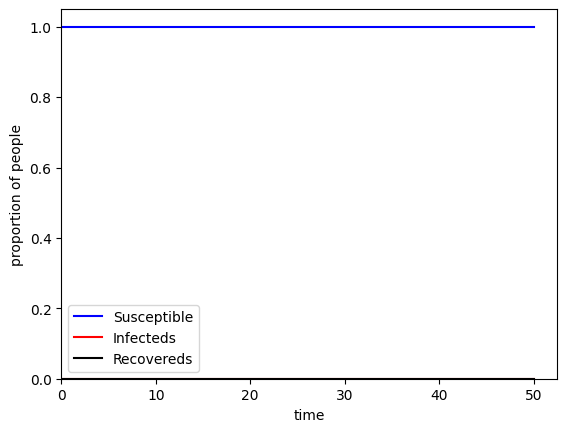

In [10]:
N = 1e6
eps = 1
# s < 1/R0
beta = 0.5
gamma = 1
S, I, R, T = SIR(N - eps, eps, 0, beta, gamma, 50, 0.05)

s = S/N
i = I/N
r = R/N

h_func = lambda r: h(r, beta/gamma)
intersection = scipy.optimize.fsolve(h_func, 1)[0]

fig, ax = plt.subplots()
ax.plot(T, s, color='b', label='Susceptible')
ax.plot(T, i, color='r', label='Infecteds')
ax.plot(T, r, color='k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('proportion of people')
ax.legend()
ax.set_ylim(bottom = 0)
ax.set_xlim(left=0)

Stability means that given a small perturbation, or for one infected individual, the compartments of people will go back to their initial state over time, or there will be little to no change in the susceptible population. If something is unstable, a small perturbation will cause radical change, meaning if one infected individual gets introduced to the population, an outbreak will occur and many people will become infected. The figure above illustrates this, as in a large population, a single individual that is initially infected hasn't caused any change in the susceptible population.